# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# set this so the graphs open internally
# %matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [93]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [76]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

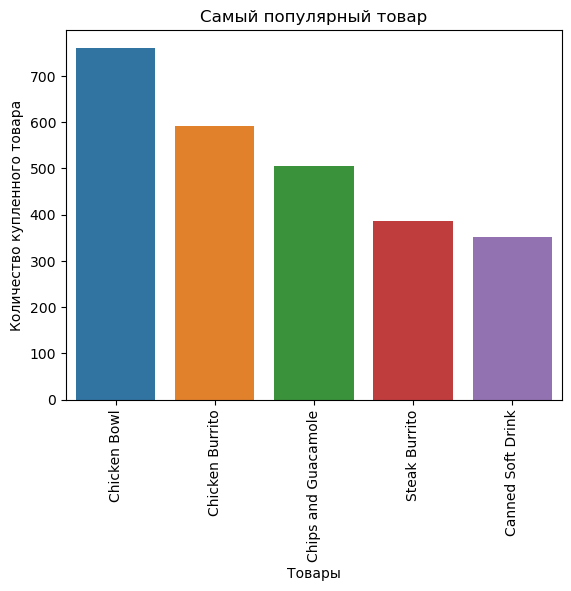

In [77]:
sns.barplot(data=chipo.groupby('item_name').quantity.sum().nlargest(5).reset_index(), x='item_name', y='quantity')
plt.xlabel('Товары')
plt.ylabel('Количество купленного товара')
plt.title('Самый популярный товар')
plt.xticks(rotation='vertical')
plt.show()

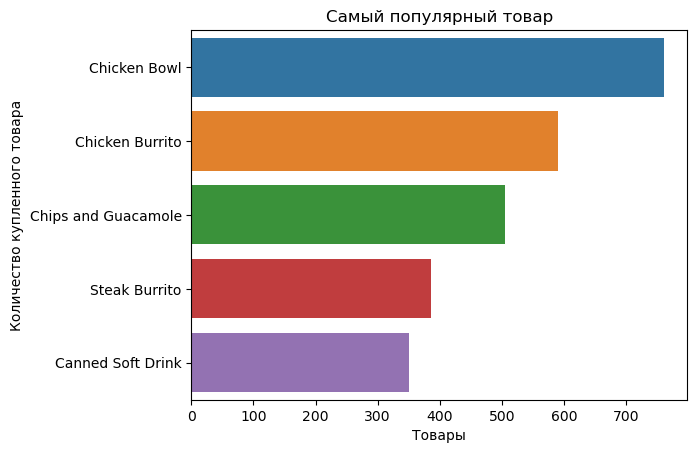

In [78]:
sns.barplot(data=chipo.groupby('item_name').quantity.sum().nlargest(5).reset_index(), y='item_name', x='quantity', orient='h')
plt.xlabel('Товары')
plt.ylabel('Количество купленного товара')
plt.title('Самый популярный товар')
plt.show()

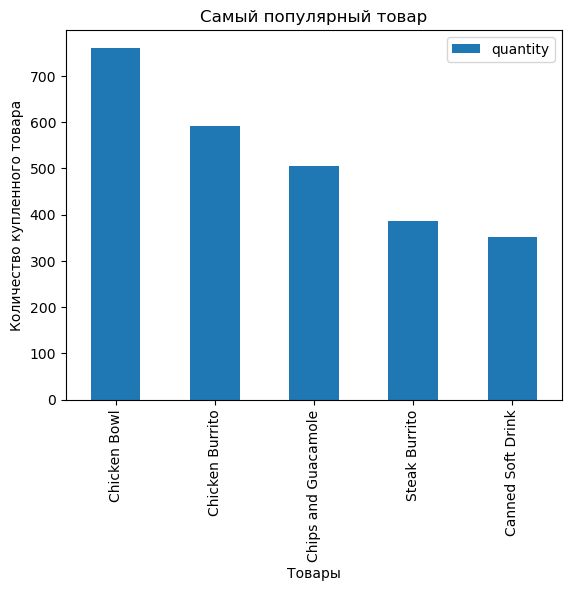

In [79]:
chipo.groupby('item_name').quantity.sum().nlargest(5).reset_index().plot(kind='bar', x='item_name')
plt.xlabel('Товары')
plt.ylabel('Количество купленного товара')
plt.title('Самый популярный товар')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [96]:
chipo['item_price'] = chipo.item_price.apply(lambda x: float(x[1:]))
# chipo['item_price'] = chipo.item_price.str.slice(1).astype(float)

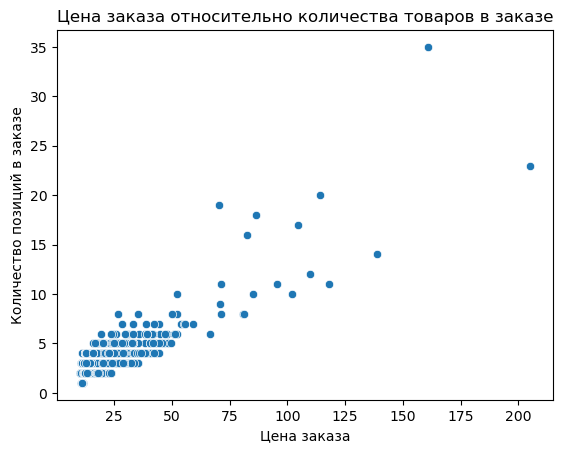

In [83]:
sns.scatterplot(data=chipo.groupby('order_id').sum().reset_index(), x='item_price', y='quantity')
plt.xlabel('Цена заказа')
plt.ylabel('Количество позиций в заказе')
plt.title('Цена заказа относительно количества товаров в заказе')
plt.show()

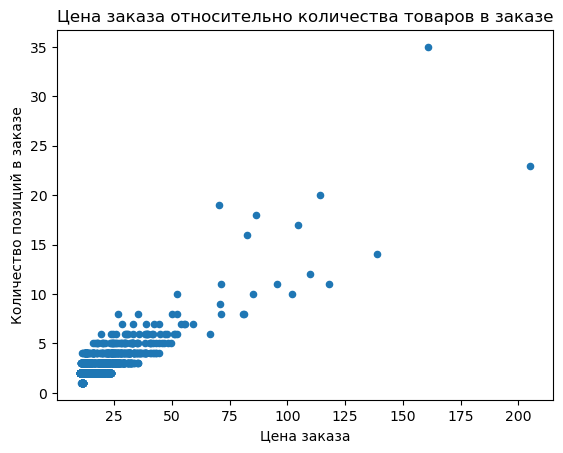

In [88]:
chipo.groupby('order_id').sum().reset_index().plot(kind='scatter', x='item_price', y='quantity')
plt.xlabel('Цена заказа')
plt.ylabel('Количество позиций в заказе')
plt.title('Цена заказа относительно количества товаров в заказе')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.